### Bag of Words

In [393]:
import numpy as np
from sklearn.model_selection import train_test_split

### kmeans.py

[2 1 0 2 1 2 1 0 2 1 0 1 1 1 1 1 0 0 2 2 1 0 1 0 0 1 2 1 1 1 0 0 2 1 1 0 1
 1 1 0 1 1 2 0 0 0 1 1 0 1 0 0 2 0 0 0 0 0 0 2 1 2 1 0 1 0 2 2 0 1 2 2 0 1
 0 1 0 0 1 2 1 0 2 2 0 1 1 0 0 0 1 0 2 0 1 0 1 2 0 0 0 0 1 1 1 0 2 0 2 0 2
 1 1 0 0 2 2 0 0 1 0 0 2 1 0 1 1 1 1 0 2 1 1 0 2 1 1 0 0 1 0 0 2 2 2 1 2 0
 1 2 2 2 1 2 0 1 2 0 0 2 1 0 0 1 1 1 0 2 1 0 0 1 2 0 0 0 1 2 2 2 1 2 2 0 0
 1 2 0 0 0 2 2 0 2 1 2 1 0 0 2 2 0 1 0 0 1 1 1 1 0 1 1 1 2 0 0 2 0 1 2 2 0
 1 0 1 1 2 0 2 2 2 1 2 0 0 2 2 2 0 2 0 0 0 0 1 2 2 1 0 1 2 2 0 1 0 2 0 1 0
 0 0 1 0 1 2 0 2 2 2 2 1 1 2 1 0 0 2 2 0 0 0 2 1 2 0 2 2 1 0 0 0 0 2 0 1 1
 2 0 2 1 2 0 0 0 2 0 0 2 2 2 1 1 1 0 0 1 1 0 2 0 2 1 1 2 0 2 1 2 1 2 0 2 1
 1 1 2 1 1 1 0 1 1 1 1 1 1 0 0 2 2 1 2 0 1 2 2 0 2 0 1 2 0 1 1 1 1 1 1 1 2
 2 2 2 1 1 0 0 1 2 2 1 2 0 0 0 2 0 0 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 1 2 1 2
 1 2 2 2 0 0 2 1 1 0 1 1 0 2 0 2 1 1 2 2 0 2 0 0 0 0 2 1 2 2 2 1 2 0 1 2 2
 0 1 1 1 2 1 0 1 2 1 1 2 2 2 0 0 1 1 2 1 2 1 2 2 2 2 0 1 1 0 2 1 2 0 1 1 2
 1 0 1 0 0 1 0 0 2 1 1 1 

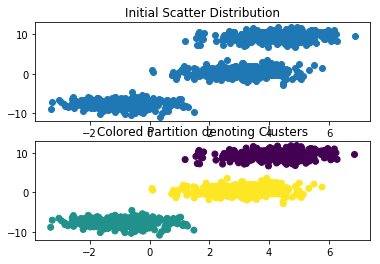

In [394]:
"""
Using SKLearns API for performing Kmeans clustering.
Using sklearn.datasets.make_blobs for generating randomized gaussians
for clustering.

"""

import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

# create a dataset sample space that will be used
# to test KMeans. Use function : make_blobs
# 

n_samples = 1000
n_features = 5;
n_clusters = 3;

# aint this sweet 
X, y = make_blobs(n_samples, n_features) 
# X => array of shape [nsamples,nfeatures] ;;; y => array of shape[nsamples]

# X : generated samples, y : integer labels for cluster membership of each sample
# 
# 

# performing KMeans clustering

ret =  KMeans(n_clusters = n_clusters).fit_predict(X)
print(ret)

__, ax = plt.subplots(2)
ax[0].scatter(X[:,0], X[:,1])
ax[0].set_title("Initial Scatter Distribution")
ax[1].scatter(X[:,0], X[:,1], c=ret)
ax[1].set_title("Colored Partition denoting Clusters")
# plt.scatter
plt.show()



### Bag.py

In [395]:
import cv2
import numpy as np 
from glob import glob 
import argparse
#from helpers import *
from matplotlib import pyplot as plt 


class BOV:
    def __init__(self, no_clusters):
        self.no_clusters = no_clusters
        self.train_path = None
        self.test_path = None
        self.im_helper = ImageHelpers()
        self.bov_helper = BOVHelpers(no_clusters)
        self.file_helper = FileHelpers()
        self.imageCount = 0
        self.trainImageCount = 0
        self.train_labels = np.array([])
        self.name_dict = {}
        self.descriptor_list = []
        
        self.path = None
        self.gray = 0
        
        self.train_images = []
        self.train_img_names = []
        self.train_cls = []
        
        self.test_images = []
        self.test_img_names = []
        self.test_cls = []      

        
    def dictionaryfy(self):
        train_dict = {}
        for i, image in enumerate(self.train_images):        
            cls = str(self.train_cls[i]).split('_')[0]
            if (cls not in train_dict):
                train_dict[cls] = []

            train_dict[cls].append(image)
        self.images = train_dict
        
        test_dict = {}
        for i, image in enumerate(self.test_images):        
            cls = str(self.test_cls[i]).split('_')[0]
            if (cls not in test_dict):
                test_dict[cls] = []

            test_dict[cls].append(image)
        self.testImages = test_dict
        
    
    def extractFeatures(self):
        # extract SIFT Features from each image
        print("train image count: ", self.trainImageCount)
        print(self.path)
        l=next(os.walk(self.path))[1]
        label_count=0
        for word in l:
            self.name_dict[word]=label_count
            label_count=label_count+1
            
        for word, imlist in self.images.items():
            #self.name_dict[str(label_count)] = word
            print("Computing Features for ", word)
            #print("List: ", imlist)
            for im in imlist:
                # cv2.imshow("im", im)
                # cv2.waitKey()
                self.train_labels = np.append(self.train_labels, self.name_dict[word])
                #plt.figure()
                #plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
                
                kp, des = self.im_helper.features(im) #self.im_helper.gray(im)
                #featureV = self.im_helper.featuresPL(im)
                #print("featureV: ", featureV)
                #print("des: ", des)
                
                
                
                self.descriptor_list.append(des)

            label_count += 1
            
        #print(self.descriptor_list)
 
    def trainModel(self):
        """
        This method contains the entire module 
        required for training the bag of visual words model

        Use of helper functions will be extensive.

        """
        # perform clustering   
        bov_descriptor_stack = self.bov_helper.formatND(self.descriptor_list)
        print("Cluster")
        self.bov_helper.cluster()
        self.bov_helper.developVocabulary(n_images = self.trainImageCount, descriptor_list=self.descriptor_list)

        # show vocabulary trained
        self.bov_helper.plotHist()
 

        self.bov_helper.standardize()
        self.runCrossval()
        print("trainModel DONE.")

    def runCrossval(self):
        self.bov_helper.train(self.train_labels)
        
    def recognize(self,test_img, test_image_path=None):

        """ 
        This method recognizes a single image 
        It can be utilized individually as well.

        """

        kp, des = self.im_helper.features(test_img)
        #des = self.im_helper.featuresPL(im)
        # print kp
        #print(des.shape)

        # generate vocab for test image
        vocab = np.array( [[ 0 for i in range(self.no_clusters)]])
        # locate nearest clusters for each of 
        # the visual word (feature) present in the image
        
        # test_ret =<> return of kmeans nearest clusters for N features
        test_ret = self.bov_helper.kmeans_obj.predict(des)
        # print test_ret

        # print vocab
        for each in test_ret:
            vocab[0][each] += 1

        #print(vocab)
        # Scale the features
        vocab = self.bov_helper.scale.transform(vocab)

        # predict the class of the image
        lb = self.bov_helper.clf.predict(vocab)
        # print "Image belongs to class : ", self.name_dict[str(int(lb[0]))]
        return lb


    def getHistogramLabels(self):
        return self.bov_helper.getHistogramLabels()
        
    def testModel(self):
        """ 
        This method is to test the trained classifier

        read all images from testing path 
        use BOVHelpers.predict() function to obtain classes of each image

        """
        wordlist=[]
        #self.testImages, self.testImageCount = self.file_helper.getFiles(self.test_path)
        
        predictions = []
        #correct_labels = []
        for word, imlist in self.testImages.items():
            #print("processing " ,word)
            for im in imlist:
                # print imlist[0].shape, imlist[1].shape
                #correct_labels.append(self.name_dict_reverse[word])
                #print(im.shape)
                cl = self.recognize(im)
                #print(cl)
                predictions.append({
                    'image':im,
                    'class':cl
                    #'object_name':self.name_dict[str(int(cl[0]))]
                    })

        #print(predictions)
        #print("CORRECT LABELS:",correct_labels)
        predicted_labels=[]
        for cl in predictions:
            predicted_labels.append(int(cl['class'][0]))
        
        actual_labels=[] 
        for cl in self.test_cls:
            actual_labels.append(self.name_dict[cl])
        print("PREDICTED: ",predicted_labels)
        print("ACTUAL: ",actual_labels)
        
        prec=precision_score(actual_labels, predicted_labels,average='macro')
        acc=accuracy_score(actual_labels, predicted_labels)
        f1=f1_score(actual_labels, predicted_labels,average='macro')
        #for each in predictions:
            # cv2.imshow(each['object_name'], each['image'])
            # cv2.waitKey()
            # cv2.destroyWindow(each['object_name'])
            # 
            #plt.imshow(cv2.cvtColor(each['image'], cv2.COLOR_GRAY2RGB))
            #plt.title(each['object_name'])
            #plt.show()
        return [prec,acc,f1]


    def print_vars(self):
        pass
    
    def loadFruits(self, path):
        self.path = path
        
        # read file. prepare file lists.
        self.train_images, self.train_img_names = self.file_helper.get_fruit_images(self.path)
        self.train_cls = [name.split('_')[0] for name in self.train_img_names]
        
        # train the model
        #self.trainModel()
        # test model
        #self.testModel()
    
    def trainTestSplit(self):
        self.train_images, self.test_images, self.train_cls, self.test_cls = train_test_split(self.train_images, self.train_cls, test_size=0.2, random_state=9253, stratify=self.train_cls)
        self.trainImageCount = len(self.train_images)
        self.testImageCount = len(self.test_images)
    
    def loadCars(self, path):
        self.path = path
        
        self.train_images, self.train_img_names = self.file_helper.get_car_images(self.path)
        self.train_cls = [0 if name.startswith('neg') else 1 for name in self.train_img_names]
        self.trainImageCount = len(self.train_images)
        
        
        self.test_images, self.test_img_names = self.file_helper.get_car_images(self.path, 'TestImages')
        self.test_cls = [0 if name.startswith('neg') else 1 for name in self.test_img_names]
        self.testImageCount = len(self.test_images)
        
        # set testing paths
        #self.test_path = test_path
        # train the model
        #self.trainModel()
        # test model
        #self.testModel()    

# if __name__ == '__main__':

#     # parse cmd args
#     parser = argparse.ArgumentParser(
#             description=" Bag of visual words example"
#         )
#     parser.add_argument('--train_path', action="store", dest="train_path", required=True)
#     parser.add_argument('--test_path', action="store", dest="test_path", required=True)

#     args =  vars(parser.parse_args())
#     print(args)

    
#     bov = BOV(no_clusters=100)

#     # set training paths
#     bov.train_path = args['train_path'] 
#     # set testing paths
#     bov.test_path = args['test_path'] 
#     # train the model
#     bov.trainModel()
#     # test model
#     bov.testModel()


### helper.py

In [396]:
import numpy as np 

from PIL import Image
import cv2

import requests
import zipfile
import tarfile
import io

import os
import glob

import gc

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

class ImageHelpers:
    def __init__(self):
        self.sift_object = cv2.xfeatures2d.SIFT_create()

    def gray(self, image):
        plt.figure()
        plt.imshow(image)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray

    def colorRGB(self, image):
        colorRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return colorRGB
    
    def features(self, image):
        keypoints, descriptors = self.sift_object.detectAndCompute(image, None)
        return [keypoints, descriptors]
    
    def featuresPL(self, image):
        im = Image.fromarray(image)
        featureVector = im.histogram()
        return featureVector


class BOVHelpers:
    def __init__(self, n_clusters = 20):
        self.n_clusters = n_clusters
        self.kmeans_obj = KMeans(n_clusters = n_clusters)
        self.kmeans_ret = None
        self.descriptor_vstack = None
        self.mega_histogram = None
        self.train_labels = None
        self.clf  = MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(100,), random_state=1)  
    def getHistogramLabels(self):
        return [self.mega_histogram,self.train_labels]
    
    def cluster(self):
        """    
        cluster using KMeans algorithm, 

        """
        self.kmeans_ret = self.kmeans_obj.fit_predict(self.descriptor_vstack)

    def developVocabulary(self,n_images, descriptor_list, kmeans_ret = None):
        
        """
        Each cluster denotes a particular visual word 
        Every image can be represeted as a combination of multiple 
        visual words. The best method is to generate a sparse histogram
        that contains the frequency of occurence of each visual word 

        Thus the vocabulary comprises of a set of histograms of encompassing
        all descriptions for all images

        """

        self.mega_histogram = np.array([np.zeros(self.n_clusters) for i in range(n_images)])
        old_count = 0
        print("n_images:",n_images)
        print("descriptor_list length:", len(descriptor_list))
        
        for i in range(n_images):
            #print(i)
            l = len(descriptor_list[i])
            for j in range(l): 
                #print(i, j)
                if kmeans_ret is None:
                    #if (old_count+j==n_images):
                    #    print(old_count+j)
                    #    break;
                    #else: 
                    idx = self.kmeans_ret[old_count+j]
                else:
                    idx = kmeans_ret[old_count+j]
                #print("why are we still here")
                self.mega_histogram[i][idx] += 1
            old_count += l
        print("Vocabulary Histogram Generated")

    def standardize(self, std=None):
        """
        
        standardize is required to normalize the distribution
        wrt sample size and features. If not normalized, the classifier may become
        biased due to steep variances.

        """
        if std is None:
            self.scale = StandardScaler().fit(self.mega_histogram)
            self.mega_histogram = self.scale.transform(self.mega_histogram)
        else:
            print("STD not none. External STD supplied")
            self.mega_histogram = std.transform(self.mega_histogram)

    def formatND(self, l):
        """    
        restructures list into vstack array of shape
        M samples x N features for sklearn

        """
        #print("l: ")
        #print(l)
        
        vStack = np.array(l[0])
        for remaining in l[1:]:
            vStack = np.vstack((vStack, remaining))
        self.descriptor_vstack = vStack.copy()
        return vStack

    def train(self, train_labels):
        """
        uses sklearn.svm.SVC classifier (SVM) 


        """
        #print("Training SVM")
        #print(self.clf)
        #print("Train labels", train_labels)
        #self.clf.fit(self.mega_histogram, train_labels)
        self.train_labels=train_labels
        self.clf.fit(self.mega_histogram, train_labels)
        names = ["Nearest Centroid", "Linear SVM","Decision Tree", "Naive Bayes","MLP"]
        classifiers = [NearestCentroid(metric="euclidean"),LinearSVC(dual=False),DecisionTreeClassifier(),GaussianNB(),MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)]
        
        for name, clf in zip(names, classifiers):
            scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
            scores = cross_validate(clf, self.mega_histogram, train_labels, cv=5, scoring=scoring,return_train_score=True)
            print(name," -- Training Set --", "Mean Accuracy", scores['train_acc'].mean())
            print(name," -- Test Set --", "Mean Accuracy", scores['test_acc'].mean())
            print(name," -- Training Set --", "Mean Precision", scores['train_prec'].mean())
            print(name," -- Test Set --", "Mean Precision", scores['test_prec'].mean())
            print(name," -- Training Set --", "Mean Recall", scores['train_rec'].mean())
            print(name," -- Test Set --", "Mean Recall", scores['test_rec'].mean())
        print("Training completed")

    def predict(self, iplist):
        predictions = self.clf.predict(iplist)
        return predictions

    def plotHist(self, vocabulary = None):
        print("Plotting histogram")
        if vocabulary is None:
            vocabulary = self.mega_histogram

        x_scalar = np.arange(self.n_clusters)
        y_scalar = np.array([abs(np.sum(vocabulary[:,h], dtype=np.int32)) for h in range(self.n_clusters)])

        print(y_scalar)

        plt.bar(x_scalar, y_scalar)
        plt.xlabel("Visual Word Index")
        plt.ylabel("Frequency")
        plt.title("Complete Vocabulary Generated")
        plt.xticks(x_scalar + 0.4, x_scalar)
        plt.show()

class FileHelpers:

    def __init__(self):
        pass
    
    def resize_images(self,images):
        """
        used to resize all images to the mean height/width
        note that this is prone to generating distorted images
        better results are expected with methods like pyramid pooling (https://arxiv.org/abs/1406.4729)
        """
        target_size = 200
        mean_shape = np.mean([[i.shape[0],i.shape[1]] for i in images], axis=0)
        max_v = max(mean_shape[0], mean_shape[1])
        # scale by preserving average ratio
        target_height = int(target_size * mean_shape[0]/max_v)
        target_width = int(target_size * mean_shape[1]/max_v)
        for i in range(len(images)):
            images[i] = np.array(Image.fromarray(images[i]).resize((target_width, target_height), Image.ANTIALIAS))
            print("Resized {} fruit images".format(i), end="\r")

        return images
    
    def get_car_images(self, car_data_path, folder = 'TrainImages'):
        print(car_data_path, folder)
        p = os.path.join(car_data_path,folder,'*.pgm')
        files = glob.glob(p)
        print("Found {} car files".format(len(files)))
        images = []
        image_names = []

        for filename in files:
            image_names.append(os.path.basename(filename))
            with Image.open(filename) as img:
                images.append(np.array(img))

        return np.array(images), image_names

    def get_fruit_images(self, fruits_data_path):
        images = []
        image_names = []
        cnt=0

        for dirpath, dirnames, filenames in os.walk(fruits_data_path):
            for filename in [f for f in filenames if f.endswith(".jpg")]:
                cnt = cnt+1
                with Image.open(os.path.join(dirpath,filename)) as img:
                    if img.format != "JPEG":
                        # we only want 3 channels
                        img = img.convert("RGB")
                    np_img = np.array(img)
                    if len(np_img.shape) != 3 or np_img.shape[2] != 3:
                        # incorrectly imported/converted RGB file
                        continue
                    images.append(np_img)
                    image_names.append(os.path.split(dirpath)[-1] + "_" + filename)
                    print("Found {} fruit files".format(len(image_names)), end="\r")
        
        
        images = np.stack(self.resize_images(images), axis=0)

        return images, image_names
    
    def getFiles(self, path):
        """
        - returns  a dictionary of all files 
        having key => value as  objectname => image path

        - returns total number of files.

        """
        imlist = {}
        count = 0
        for each in glob(path + "*"):
            each = each.replace("\\", "/")
            word = each.split("/")[-1]
            print(" #### Reading image category ", word, " ##### ")
            imlist[word] = []
            for imagefile in glob(path+word+"/*"):
                imagefile = imagefile.replace("\\", "/")
                print("Reading file ", imagefile)
                
                
                im = Image.open(imagefile)
                if (im.format != "JPEG"):
                    im = im.convert("RGB")
                np_im = np.array(im)
                if len(np_im.shape) != 3 or np_im.shape[2] != 3:
                    # incorrectly imported/converted RGB file
                    continue
                
                #im = cv2.imread(imagefile,1)
                
                #plt.imshow(im)
                imlist[word].append(np_im)
                count +=1 

        return [imlist, count]



### Load images

In [397]:
cars = BOV(no_clusters=100)
cars.loadCars("../../../ex3/CarData/")
fruits = BOV(no_clusters=100)
fruits.loadFruits("../../ex3/FIDS30/")

../../../ex3/CarData/ TrainImages
Found 0 car files
../../../ex3/CarData/ TestImages
Found 0 car files


Text(0.5, 1.0, 'Colour Histogram, using PIL')

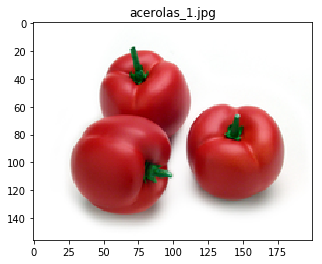

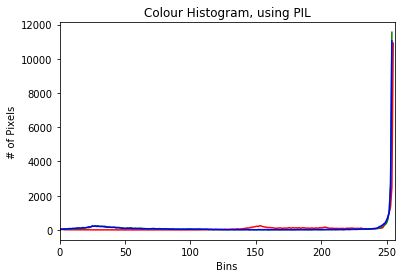

In [398]:
im = Image.fromarray(fruits.train_images[0])
plt.imshow(im)
plt.title(fruits.train_img_names[0])

featureVector = im.histogram()

plt.figure()
plt.plot(featureVector[:256], 'r')
plt.plot(featureVector[257:512], 'g')
plt.plot(featureVector[513:], 'b')
plt.xlim([0, 256])
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.title("Colour Histogram, using PIL")

### Train/test split

In [399]:
print("{} unique classes for cars".format(len(set(cars.train_cls))))
print("{} unique classes for fruits".format(len(set(fruits.train_cls))))

fruits.trainTestSplit()

0 unique classes for cars
30 unique classes for fruits


Text(0.5, 1.0, 'watermelons')

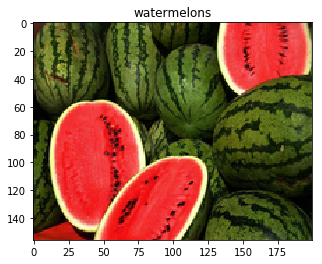

In [400]:
cars.dictionaryfy()
fruits.dictionaryfy()
im = Image.fromarray(fruits.images['watermelons'][0])
plt.imshow(im)
plt.title('watermelons')

In [401]:
#%time cars.extractFeatures()
#cars.testModel()

In [402]:
l=next(os.walk("../../ex3/fruits_small/"))[1]
l

['acerolas',
 'apples',
 'apricots',
 'avocados',
 'bananas',
 'blackberries',
 'blueberries',
 'cantaloupes',
 'cherries',
 'coconuts',
 'figs',
 'grapefruits',
 'grapes',
 'guava',
 'kiwifruit',
 'lemons',
 'limes',
 'mangos',
 'olives',
 'oranges',
 'passionfruit',
 'peaches',
 'pears',
 'pineapples',
 'plums',
 'pomegranates',
 'raspberries',
 'strawberries',
 'tomatoes',
 'watermelons']

In [403]:
#%time cars.trainModel()
# perform clustering   
#%time bov_descriptor_stack = cars.bov_helper.formatND(cars.descriptor_list)
#%time cars.bov_helper.cluster()
#%time cars.bov_helper.developVocabulary(n_images = cars.trainImageCount, descriptor_list=cars.descriptor_list)

# show vocabulary trained
#%time cars.bov_helper.plotHist()


#%time cars.bov_helper.standardize()
#%time cars.bov_helper.train(cars.train_labels)
#print("trainModel DONE.")


In [404]:
for i,l in enumerate(cars.descriptor_list):
    print(i)
    if (l is None):
        print(i)
        print(l)

In [405]:
%time fruits.extractFeatures()

train image count:  774
../../ex3/FIDS30/
Computing Features for  pomegranates
Computing Features for  mangos
Computing Features for  apples
Computing Features for  cherries
Computing Features for  cantaloupes
Computing Features for  olives
Computing Features for  grapes
Computing Features for  peaches
Computing Features for  passionfruit
Computing Features for  tomatoes
Computing Features for  guava
Computing Features for  pineapples
Computing Features for  strawberries
Computing Features for  oranges
Computing Features for  bananas
Computing Features for  watermelons
Computing Features for  blueberries
Computing Features for  avocados
Computing Features for  limes
Computing Features for  acerolas
Computing Features for  grapefruits
Computing Features for  coconuts
Computing Features for  apricots
Computing Features for  raspberries
Computing Features for  figs
Computing Features for  kiwifruit
Computing Features for  blackberries
Computing Features for  pears
Computing Features for  

Cluster
n_images: 774
descriptor_list length: 774
Vocabulary Histogram Generated
Plotting histogram
[1896 1317 2247 1637 1581 1406 1447 1582 2019 1484 2827 1605 1762 1127
 1409 3016 1699 1164 1543 1609 1816 1404 1386 1298 1457 1527 1284 1401
 1483 2093 1535 1257 1443 1278 1344 1509 1663 1267 1356 1975 1388 2248
 1692 1384 1677 1440 1234 1506 1298 1108 1284 1462 1402 1585 1717 1200
 1400 1384 1212 1518 1754 1356 1130 1248 1205 1248 1532 1477 1337 1343
 2240 1574 1273 1328 1519 1535 1138 1244 1454 1336 2435 1427 1434 1354
 1710 1976 1250 1795 1902 1402 1702 1585 1487 1436 1544 1421 1116 1684
 1061 1500]


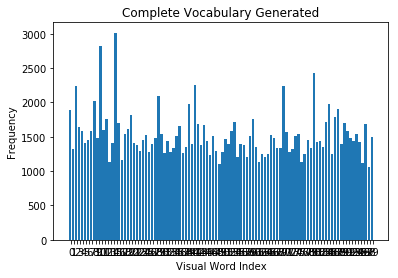

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Nearest Centroid  -- Training Set -- Mean Accuracy 0.42950828387616047
Nearest Centroid  -- Test Set -- Mean Accuracy 0.2910118952463862
Nearest Centroid  -- Training Set -- Mean Precision 0.48538843009511473
Nearest Centroid  -- Test Set -- Mean Precision 0.32699169933380456
Nearest Centroid  -- Training Set -- Mean Recall 0.4307015612213937
Nearest Centroid  -- Test Set -- Mean Recall 0.2875793650793651


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Linear SVM  -- Training Set -- Mean Accuracy 0.9896354549916104
Linear SVM  -- Test Set -- Mean Accuracy 0.23069371305450406
Linear SVM  -- Training Set -- Mean Precision 0.9906682733525549
Linear SVM  -- Test Set -- Mean Precision 0.2473042143042143
Linear SVM  -- Training Set -- Mean Recall 0.9898135267636174
Linear SVM  -- Test Set -- Mean Recall 0.22575396825396826
Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.18396361539766187
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.17986816886816887
Decision Tree  -- Training Set -- Mean Recall 1.0
Decision Tree  -- Test Set -- Mean Recall 0.17925396825396828


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes  -- Training Set -- Mean Accuracy 0.4890430465017423
Naive Bayes  -- Test Set -- Mean Accuracy 0.2770498698646813
Naive Bayes  -- Training Set -- Mean Precision 0.5404920463214179
Naive Bayes  -- Test Set -- Mean Precision 0.28123014023014026
Naive Bayes  -- Training Set -- Mean Recall 0.48979694316543815
Naive Bayes  -- Test Set -- Mean Recall 0.2692619047619048
MLP  -- Training Set -- Mean Accuracy 1.0
MLP  -- Test Set -- Mean Accuracy 0.27171743701477113
MLP  -- Training Set -- Mean Precision 1.0
MLP  -- Test Set -- Mean Precision 0.2641449661449661
MLP  -- Training Set -- Mean Recall 1.0
MLP  -- Test Set -- Mean Recall 0.2598650793650794
Training completed
trainModel DONE.
Wall time: 10min 32s


In [406]:
%time fruits.trainModel()

In [407]:
#%time fruits.runCrossval()
histogramLabels = fruits.getHistogramLabels()
names = ["Nearest Centroid", "Linear SVM","Decision Tree", "Naive Bayes","MLP"]
classifiers = [NearestCentroid(metric="euclidean"),LinearSVC(dual=False),DecisionTreeClassifier(),GaussianNB(),MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)]
        
for name, clf in zip(names, classifiers):
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5, scoring=scoring,return_train_score=True)
    print(name," -- Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print(name," -- Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print(name," -- Training Set --", "Mean Precision", scores['train_prec'].mean())
    print(name," -- Test Set --", "Mean Precision", scores['test_prec'].mean())
    print(name," -- Training Set --", "Mean Recall", scores['train_rec'].mean())
    print(name," -- Test Set --", "Mean Recall", scores['test_rec'].mean())
print("Training completed")

Nearest Centroid  -- Training Set -- Mean Accuracy 0.42950828387616047
Nearest Centroid  -- Test Set -- Mean Accuracy 0.2910118952463862
Nearest Centroid  -- Training Set -- Mean Precision 0.48538843009511473
Nearest Centroid  -- Test Set -- Mean Precision 0.32699169933380456
Nearest Centroid  -- Training Set -- Mean Recall 0.4307015612213937
Nearest Centroid  -- Test Set -- Mean Recall 0.2875793650793651


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Linear SVM  -- Training Set -- Mean Accuracy 0.9896354549916104
Linear SVM  -- Test Set -- Mean Accuracy 0.23069371305450406
Linear SVM  -- Training Set -- Mean Precision 0.9906682733525549
Linear SVM  -- Test Set -- Mean Precision 0.2473042143042143
Linear SVM  -- Training Set -- Mean Recall 0.9898135267636174
Linear SVM  -- Test Set -- Mean Recall 0.22575396825396826
Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.18372336595492328
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.19233597883597883
Decision Tree  -- Training Set -- Mean Recall 1.0
Decision Tree  -- Test Set -- Mean Recall 0.17819841269841272


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes  -- Training Set -- Mean Accuracy 0.4890430465017423
Naive Bayes  -- Test Set -- Mean Accuracy 0.2770498698646813
Naive Bayes  -- Training Set -- Mean Precision 0.5404920463214179
Naive Bayes  -- Test Set -- Mean Precision 0.28123014023014026
Naive Bayes  -- Training Set -- Mean Recall 0.48979694316543815
Naive Bayes  -- Test Set -- Mean Recall 0.2692619047619048


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

MLP  -- Training Set -- Mean Accuracy 0.1882960004830393
MLP  -- Test Set -- Mean Accuracy 0.09977849460625611
MLP  -- Training Set -- Mean Precision 0.09994536934704124
MLP  -- Test Set -- Mean Precision 0.041548396204229385
MLP  -- Training Set -- Mean Recall 0.15436261404022522
MLP  -- Test Set -- Mean Recall 0.08164285714285716
Training completed


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


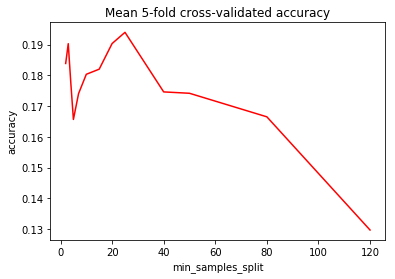

In [408]:
min_samples_splits = [2,3,4,5,7,10,15,20,25,40,50,80,120]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

0 --- 1e-05
[0.30769231 0.20930233 0.22093023 0.28915663 0.27160494 0.31168831
 0.31944444 0.33333333 0.27272727 0.23809524]
1 --- 0.0001
[0.32967033 0.3372093  0.27906977 0.3373494  0.33333333 0.36363636
 0.34722222 0.37681159 0.36363636 0.36507937]
2 --- 0.001
[0.41758242 0.37209302 0.34883721 0.43373494 0.37037037 0.36363636
 0.36111111 0.49275362 0.33333333 0.33333333]
3 --- 0.01
[0.41758242 0.34883721 0.37209302 0.42168675 0.37037037 0.28571429
 0.36111111 0.37681159 0.27272727 0.26984127]
4 --- 0.1
[0.35164835 0.24418605 0.27906977 0.36144578 0.33333333 0.28571429
 0.31944444 0.28985507 0.24242424 0.20634921]
5 --- 1
[0.28571429 0.23255814 0.1744186  0.27710843 0.25925926 0.25974026
 0.29166667 0.31884058 0.21212121 0.19047619]
6 --- 10
[0.21978022 0.23255814 0.12790698 0.27710843 0.2345679  0.25974026
 0.22222222 0.24637681 0.24242424 0.14285714]
7 --- 100


D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

[0.1978022  0.23255814 0.12790698 0.25301205 0.22222222 0.23376623
 0.18055556 0.20289855 0.1969697  0.12698413]
8 --- 1000


D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

[0.17582418 0.22093023 0.12790698 0.24096386 0.2345679  0.22077922
 0.15277778 0.2173913  0.16666667 0.12698413]


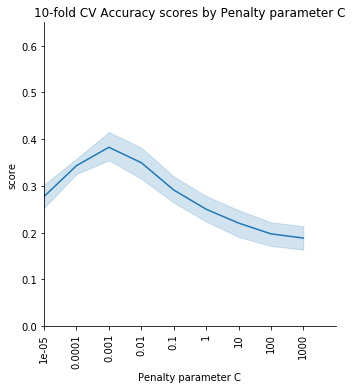

In [409]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
import pandas as pd

C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
results = []
for idx, c in enumerate(C):
    print(idx, "---", c)
    clf=LinearSVC(C=c, loss='squared_hinge', max_iter=100000, multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
    scores = cross_validate(clf,  histogramLabels[0], histogramLabels[1], cv=5)['test_score']
    print(scores)
    for score in scores:
        results.append({'score': score, 'x':idx, 'penalty':c})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", data=df_trace)
plt.xticks(range(len(C)), C, rotation='vertical')
plt.xlabel("Penalty parameter C")
plt.title("10-fold CV Accuracy scores by Penalty parameter C")
axes = plt.gca()
axes.set_ylim([0.0,0.65])
axes.set_xlim([0,len(C)])
plt.savefig('scaled_amz_C_eval.pdf')
plt.show()

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.24619927164155547
Test Set -- Mean Accuracy 0.1513034381023019
Training Set -- Mean Precision 0.17996308331652047
Test Set -- Mean Precision 0.08667439967439967
Training Set -- Mean Recall 0.22306316832689901
Test Set -- Mean Recall 0.13749999999999998


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.5602351416095706
Test Set -- Mean Accuracy 0.25728535248155693
Training Set -- Mean Precision 0.5975233670066277
Test Set -- Mean Precision 0.22443990268990271
Training Set -- Mean Recall 0.5407232083694031
Test Set -- Mean Recall 0.24333333333333332


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.9271921600573503
Test Set -- Mean Accuracy 0.24892435446654346
Training Set -- Mean Precision 0.9272161150565719
Test Set -- Mean Precision 0.23843650793650792
Training Set -- Mean Recall 0.9232198555230994
Test Set -- Mean Recall 0.2361111111111111


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.9998552821997105
Test Set -- Mean Accuracy 0.3136749888827969
Training Set -- Mean Precision 0.9998809523809523
Test Set -- Mean Precision 0.3229790764790765
Training Set -- Mean Recall 0.9998412698412699
Test Set -- Mean Recall 0.3044444444444444


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.34549721555403534
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.344547619047619
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3369444444444445


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3665544431430524
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.38039153439153434
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3561111111111111


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.36258670794848874
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3571715506715506
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3524999999999999


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3541954008364138
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.35557431457431454
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.34805555555555556


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.36072922752868014
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.34633333333333327
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.35194444444444445


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3573130779138328
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.34817460317460314
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3508333333333333


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3632948731620466
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.35564177489177484
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3536111111111111


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.37433089158803956
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.36276587301587304
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.36444444444444446


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


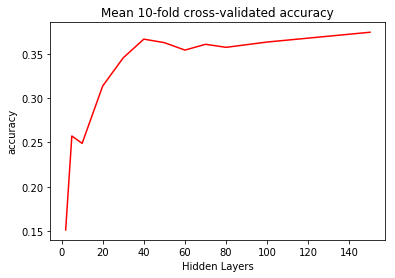

In [410]:
layers = [2,5,10,20,30,40,50,60,70,80,100,150]
results = []
for l in layers:
    clf = MLPClassifier(solver='lbfgs', alpha=1,hidden_layer_sizes=(l,), random_state=1)
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=10, scoring=scoring,return_train_score=True)
    print("Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print("Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print("Training Set --", "Mean Precision", scores['train_prec'].mean())
    print("Test Set --", "Mean Precision", scores['test_prec'].mean())
    print("Training Set --", "Mean Recall", scores['train_rec'].mean())
    print("Test Set --", "Mean Recall", scores['test_rec'].mean())
    results.append(scores['test_acc'].mean())

plt.plot(layers, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layers")
plt.title("Mean 10-fold cross-validated accuracy")
plt.show()

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.33417348115341305
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3278796296296296
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3266666666666666


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3434469181878942
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.334292328042328
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.33444444444444443


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3756201571437236
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.38330699855699857
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.36444444444444446


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.38124085098600957
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.36893650793650795
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3694444444444444


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3632948731620466
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.35564177489177484
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3536111111111111


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.9313561984136047
Test Set -- Mean Accuracy 0.4027900178499543
Training Set -- Mean Precision 0.9402983765328411
Test Set -- Mean Precision 0.38782936507936505
Training Set -- Mean Recall 0.9277817438195355
Test Set -- Mean Recall 0.39055555555555554


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.31302250615253424
Test Set -- Mean Accuracy 0.2695934876238497
Training Set -- Mean Precision 0.24772928421591364
Test Set -- Mean Precision 0.1682463613384666
Training Set -- Mean Recall 0.2780765441902103
Test Set -- Mean Recall 0.24055555555555555


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


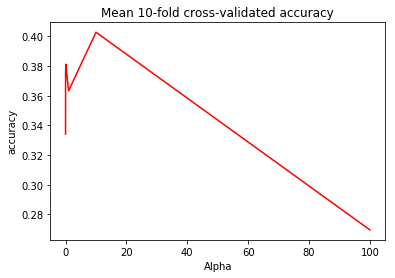

In [411]:
alphas = [0.0001,0.001,0.01,0.1,1,10,100]
results = []
for a in alphas:
    clf = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(100,), random_state=1)
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=10, scoring=scoring,return_train_score=True)
    print("Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print("Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print("Training Set --", "Mean Precision", scores['train_prec'].mean())
    print("Test Set --", "Mean Precision", scores['test_prec'].mean())
    print("Training Set --", "Mean Recall", scores['train_rec'].mean())
    print("Test Set --", "Mean Recall", scores['test_rec'].mean())
    results.append(scores['test_acc'].mean())

plt.plot(alphas, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Alpha")
plt.title("Mean 10-fold cross-validated accuracy")
plt.show()

In [412]:
ret=fruits.testModel()
print(ret)

D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float6

D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float6

D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float6

D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float6

D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float6

PREDICTED:  [4, 13, 10, 13, 23, 14, 4, 7, 19, 19, 9, 7, 16, 28, 28, 8, 13, 18, 8, 18, 12, 1, 11, 6, 10, 12, 24, 12, 24, 28, 6, 24, 22, 4, 0, 4, 17, 28, 7, 4, 2, 13, 4, 4, 11, 11, 22, 19, 11, 15, 5, 6, 0, 25, 25, 28, 2, 10, 15, 16, 4, 17, 29, 19, 11, 19, 15, 17, 23, 14, 23, 27, 23, 23, 23, 8, 25, 8, 8, 17, 8, 1, 9, 19, 17, 3, 2, 24, 12, 17, 1, 0, 28, 6, 0, 28, 5, 24, 20, 29, 20, 1, 18, 19, 7, 16, 16, 21, 15, 4, 4, 17, 1, 3, 11, 3, 18, 4, 6, 27, 28, 6, 27, 23, 27, 24, 6, 23, 19, 17, 22, 7, 6, 13, 4, 24, 24, 18, 25, 17, 24, 12, 0, 5, 24, 5, 5, 27, 6, 29, 5, 21, 11, 26, 26, 26, 24, 17, 15, 12, 12, 27, 12, 12, 12, 29, 6, 15, 20, 24, 29, 9, 9, 9, 9, 10, 11, 11, 22, 11, 29, 21, 28, 2, 22, 9, 22, 3, 14, 22, 6, 14, 9, 7]
ACTUAL:  [13, 7, 28, 6, 1, 4, 11, 4, 4, 25, 10, 19, 6, 6, 23, 8, 19, 3, 18, 0, 20, 7, 16, 7, 22, 15, 3, 23, 27, 18, 17, 24, 5, 15, 1, 25, 17, 26, 4, 25, 6, 7, 12, 13, 11, 27, 29, 4, 12, 1, 23, 12, 13, 22, 8, 27, 24, 5, 1, 17, 10, 9, 1, 27, 2, 19, 17, 27, 23, 8, 10, 28, 21, 16, 

D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float6

### Cars

In [413]:
#bov = BOV(no_clusters=100)
#bov.start("images\\train\\", "images\\test\\")
#bov.start("../../../ex3/CarData/TrainImages/", "../../../ex3/CarData/TestImages/")
#bov.start("../../../ex3/FIDS30/train/", "../../../ex3/FIDS30/test/")